In [1]:
import numpy as np

test_images=np.load('test_images.npy')
test_labels=np.load('test_labels.npy')
train_images=np.load('train_images.npy')
train_labels=np.load('train_labels.npy')

In [2]:
train_images=np.reshape(train_images,[2251,512,512,1])
test_images=np.reshape(test_images,[250,512,512,1])

In [8]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD



def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(512, 512,1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

 





In [11]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 512, 512, 32)      320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 256, 256, 32)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 128)    

Train on 2251 samples, validate on 250 samples
Epoch 1/5
2251/2251 [==============================] - 611s 272ms/step - loss: 0.1271 - accuracy: 0.7090 - val_loss: 0.1168 - val_accuracy: 0.7640
Epoch 2/5
2251/2251 [==============================] - 4920s 2s/step - loss: 0.0372 - accuracy: 0.9063 - val_loss: 0.1011 - val_accuracy: 0.7640
Epoch 3/5
2251/2251 [==============================] - 1160s 515ms/step - loss: 0.0370 - accuracy: 0.9058 - val_loss: 0.1009 - val_accuracy: 0.7640
Epoch 4/5
2251/2251 [==============================] - 586s 260ms/step - loss: 0.0360 - accuracy: 0.9067 - val_loss: 0.0986 - val_accuracy: 0.7720
Epoch 5/5
2251/2251 [==============================] - 450s 200ms/step - loss: 0.0354 - accuracy: 0.9076 - val_loss: 0.0986 - val_accuracy: 0.7720


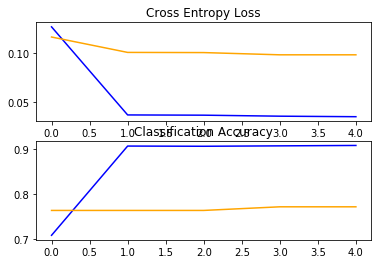

In [10]:
model = define_model()
x=model.fit(train_images,train_labels, validation_data=(test_images,test_labels),epochs=5)
summarize_diagnostics(x)